In [28]:
import os
import cv2
import random
import matplotlib.pyplot as plt

base_dir = "data/Data_Brain/Train"

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]




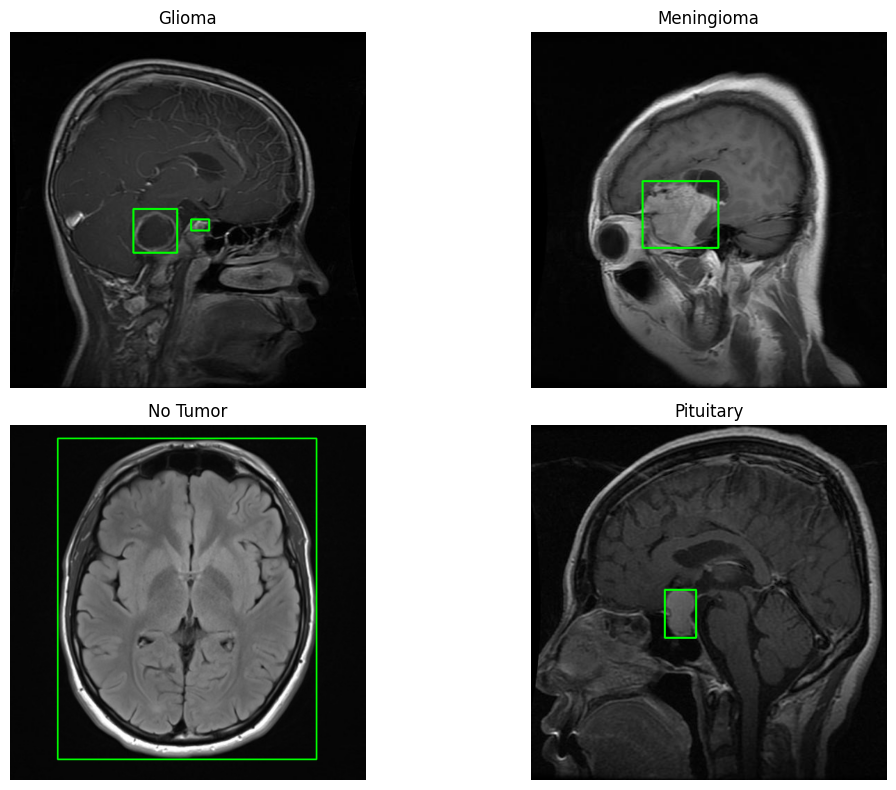

In [29]:

def draw_yolo_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x_center, y_center, bw, bh = map(float, parts)
            cls_id = int(cls_id)

            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

plt.figure(figsize=(12, 8))

all_images = []
for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not images:
        continue
    img_file = random.choice(images)

    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    if os.path.exists(label_path):
        img = draw_yolo_boxes(img_path, label_path)
    else:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [30]:
import shutil
from sklearn.model_selection import train_test_split

for cls in classes:
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    all_images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not all_images:
        continue

    train_images, valid_images = train_test_split(all_images, test_size=0.2, random_state=42)

    for split in ["train", "valid"]:
        img_split_dir = os.path.join(base_dir, cls, "images", split)
        label_split_dir = os.path.join(base_dir, cls, "labels", split)
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    for split_name, split_list in [("train", train_images), ("valid", valid_images)]:
        for img_name in split_list:
            img_path = os.path.join(img_dir, img_name)
            label_name = os.path.splitext(img_name)[0] + ".txt"
            label_path = os.path.join(label_dir, label_name)

            if os.path.exists(label_path):
                img_dest = os.path.join(base_dir, cls, "images", split_name, img_name)
                label_dest = os.path.join(base_dir, cls, "labels", split_name, label_name)

                shutil.copy(img_path, img_dest)
                shutil.copy(label_path, label_dest)
            else:
                print(f"⚠️ Label manquant pour l'image {img_name}, elle sera ignorée.")

In [31]:
base_dir = "data/Data_Brain/Train"
classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

total_train_imgs = 0
total_train_labels = 0
total_valid_imgs = 0
total_valid_labels = 0

for cls in classes:
    print(f"-{cls}")
    for split in ["train", "valid"]:
        img_dir = os.path.join(base_dir, cls, "images", split)
        label_dir = os.path.join(base_dir, cls, "labels", split)

        img_files = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
        label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]

        num_imgs = len(img_files)
        num_labels = len(label_files)

        if split == "train":
            total_train_imgs += num_imgs
            total_train_labels += num_labels
        else:
            total_valid_imgs += num_imgs
            total_valid_labels += num_labels

        print(f"{split} : {num_imgs} images, {num_labels} labels")


print(f"Train : {total_train_imgs} images / {total_train_labels} labels")
print(f"Valid : {total_valid_imgs} images / {total_valid_labels} labels")



-Glioma
train : 922 images, 922 labels
valid : 231 images, 231 labels
-Meningioma
train : 1159 images, 1159 labels
valid : 290 images, 290 labels
-No Tumor
train : 568 images, 568 labels
valid : 143 images, 143 labels
-Pituitary
train : 1139 images, 1139 labels
valid : 285 images, 285 labels
Train : 3788 images / 3788 labels
Valid : 949 images / 949 labels


In [32]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model2 = YOLO("yolov8n.pt")
results = model.train(data="data.yaml", epochs=100, imgsz=640, device=0 , batch=16)
results2 = model2.train(data="data2.yaml", epochs=100, imgsz=640, device=0 , batch=16)


Ultralytics 8.3.219 🚀 Python-3.12.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 7808MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [33]:
model.val()


Ultralytics 8.3.219 🚀 Python-3.12.3 torch-2.5.1+cu121 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 7808MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2538.0±951.5 MB/s, size: 30.0 KB)
val: Scanning /home/epsilon/Desktop/folder_0/projects/sprint_1/MultiModal-Cancer-Detection/data/Data_Brain/Train/Glioma/labels/valid.cache... 949 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 949/949 1.7Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 60/60 10.9it/s 5.5s0.1s
                   all        949       1059      0.939      0.917      0.956      0.777
                Glioma        232        269       0.89      0.822        0.9      0.672
            Meningioma        284        290      0.971      0.972      0.986      0.842
              No Tumor        143        143      0.993      0.993      0.993      0.858
            

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd1c1c58230>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.0

In [34]:
results = model.predict(source="test.jpg")


FileNotFoundError: test.jpg does not exist